In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets

X, y = datasets.load_digits(return_X_y=True)
print(X[0].reshape(8,8))# так представлены данные
print(y[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
0


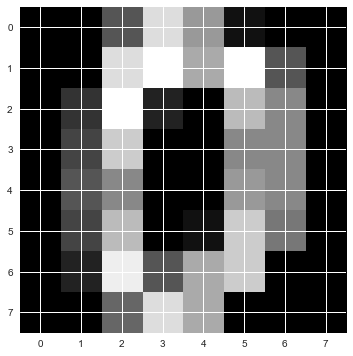

In [3]:
%matplotlib inline
plt.figure(figsize=(16, 6))
plt.imshow(X[0,:].reshape([8,8]), cmap='gray')

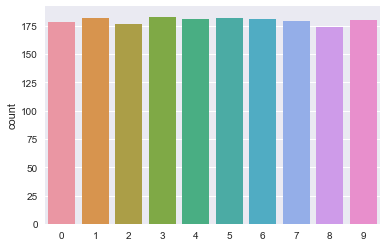

In [4]:
sns.countplot(y)#так распределены типы цифр в датасете

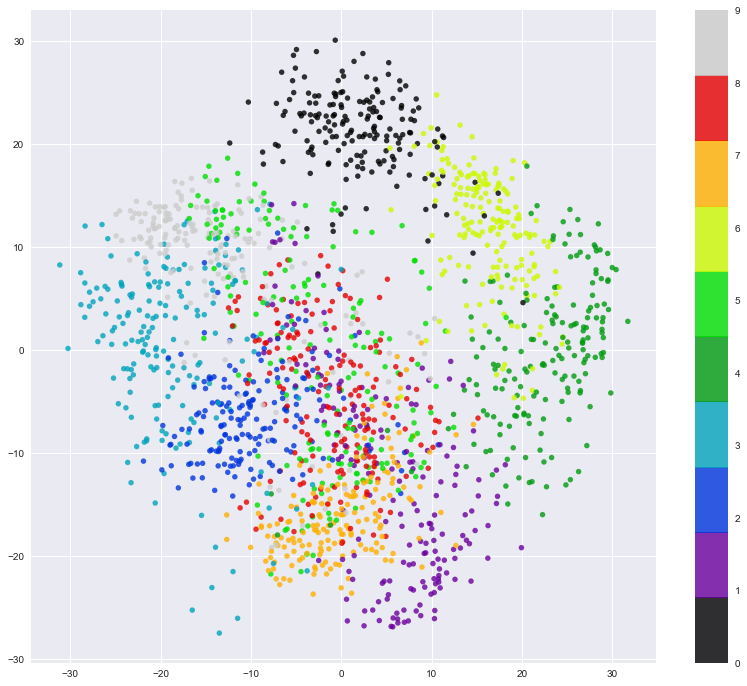

In [5]:
# с помощью метода главных компонент сожмем все признаки (64шт) в 2 признака. Этопозволит изобразить объекты на плоскости
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=666)

X_reduced = pca.fit_transform(X)
plt.figure(figsize=(14,12))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=30,)
plt.colorbar()

# Кластеризация признаков

In [6]:
df = pd.read_csv('young-people-survey.csv', sep=',')
print(df.shape)
df.head()

(1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [7]:
df.dtypes# так можно смотреть тип признаков

Music                         float64
Slow songs or fast songs      float64
Dance                         float64
Folk                          float64
Country                       float64
Classical music               float64
Musical                       float64
Pop                           float64
Rock                          float64
Metal or Hardrock             float64
Punk                          float64
Hiphop, Rap                   float64
Reggae, Ska                   float64
Swing, Jazz                   float64
Rock n roll                   float64
Alternative                   float64
Latino                        float64
Techno, Trance                float64
Opera                         float64
Movies                        float64
Horror                        float64
Thriller                      float64
Comedy                        float64
Romantic                      float64
Sci-fi                        float64
War                           float64
Fantasy/Fair

In [8]:
string_features=list(df.select_dtypes(include=['object']))
print(string_features)

['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage', 'Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']


In [10]:
#так строки можно заменить на коды
for feature in string_features:
        labels, levels = pd.factorize(df[feature])
        df[feature]=labels

In [11]:
#осталось разобраться с пропусками данных
df=df.dropna()

In [13]:
# признаков очень много. Может быть их кластеризовать?
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_transp = scaler.fit_transform(df.T)

In [14]:
# А теперь можно транспонированную таблицу кластеризовать
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=20)
clustering.fit(df_transp)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
# хочется посмотреть, какие признаки попали в один кластер
print(len(list(df)))
print(clustering.labels_.shape)

#arr=np.argwhere(clustering.labels_==5)
#arr_new=np.array(arr.T)[0]

#[list(df)[index] for index in list(arr_new)]

for i in range(20):# 20 это число кластеров
    arr=np.argwhere(clustering.labels_==i)
    arr_new=np.array(arr.T)[0]
    print([list(df)[index] for index in list(arr_new)])

150
(150,)
['Music', 'Movies', 'Comedy', 'Internet', 'Fun with friends', 'Borrowed stuff']
['Height']
['Weight']
['Age']
['Folk', 'Country', 'Techno, Trance', 'Western', 'Mathematics', 'Physics', 'Law', 'Writing', 'Gardening', 'Flying', 'Fake', 'Hypochondria', 'Eating to survive', 'Charity']
['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage', 'Number of siblings', 'Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']
['Pop', 'Romantic', 'Psychology', 'Thinking ahead', 'Decision making', 'Self-criticism', 'Health', 'God', 'Mood swings', 'Appearence and gestures', 'Knowing the right people', 'Unpopularity', 'Life struggles', 'Getting up', "Parents' advice"]
['Shopping', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks']
['Biology', 'Chemistry', 'Medicine', 'Religion']
['Slow songs or fast songs', 'Thriller', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Action', 'Foreign languages', 'C

In [ ]:
#Кластеризация по столбцам - это альтернатива подсчету корреляции между столбцами

# Домашка
Для таблицы young-people сделать следующее:

1. сделать нормализацию данных
2. запустить модель Лассо (см. тему "Линейная регрессия"), предсказывая "Пол человека"
3. Выдать список неинформативных признаков (тех, у кого вес в модели "Лассо" оказался равным 0)
4. ДЛя запуска модели Лассо нужно указывать значение константы. Выберете для п.2 (см. выше) любое ненулевое начение.

5. Методом перебора (в цикле) найдите такое значение константы для Лассо, что занулится не менее половины признаков.